<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/okno/OKNO_3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praca z szeregami czasowymi

Biblioteka Pandas została pierwotnie opracowana w kontekście modelowania finansowego, więc jak można się spodziewać, zawiera bogaty zestaw narzędzi do pracy z datami, czasami i danymi indeksowanymi czasowo.
Dane dotyczące daty i czasu występują w kilku wariantach, które omówimy tutaj:

- *Znaczniki czasu (Timestamps)* odnoszą się do określonych momentów w czasie (np. 4 lipca 2021 o 7:00 rano).
- *Interwały czasowe (Time intervals)* i *okresy (periods)* odnoszą się do długości czasu między określonym punktem początkowym a końcowym; na przykład miesiąc czerwiec 2021. Okresy zazwyczaj odnoszą się do szczególnego przypadku interwałów czasowych, w których każdy interwał ma jednolitą długość i nie nakłada się (np. 24-godzinne okresy składające się na dni).
- *Delty czasowe (Time deltas)* lub *czasy trwania (durations)* odnoszą się do dokładnej długości czasu (np. czas trwania 22,56 sekundy).


## Daty i czasy w Pythonie

Świat Pythona oferuje wiele dostępnych reprezentacji dat, czasów, delt i przedziałów czasowych.
Chociaż narzędzia do szeregów czasowych dostarczane przez Pandas są zazwyczaj najbardziej użyteczne w zastosowaniach związanych z analizą danych, warto zobaczyć ich związek z innymi narzędziami używanymi w Pythonie.

### Natywne daty i czasy w Pythonie: `datetime` i `dateutil`

Podstawowe obiekty Pythona do pracy z datami i czasami znajdują się we wbudowanym module `datetime`.
Wraz z zewnętrznym modułem `dateutil` można go używać do szybkiego wykonywania wielu użytecznych operacji na datach i czasach.
Na przykład można ręcznie zbudować datę za pomocą typu `datetime`:

In [1]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

Lub, używając modułu `dateutil`, można parsować daty z różnych formatów tekstowych:

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

Gdy już mamy obiekt `datetime`, możemy robić takie rzeczy, jak wypisywanie dnia tygodnia:

In [3]:
date.strftime('%A')

'Sunday'

Użyliśmy tutaj jednego ze standardowych kodów formatowania ciągów znaków do drukowania dat (`'%A'`), o których można przeczytać w sekcji [`strftime` dokumentacji `datetime` Pythona](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).
Dokumentację innych przydatnych narzędzi do dat można znaleźć w [dokumentacji online `dateutil`](http://labix.org/python-dateutil).
Powiązanym pakietem, o którym warto wiedzieć, jest [`pytz`](http://pytz.sourceforge.net/), który zawiera narzędzia do pracy z najbardziej przyprawiającym o ból głowy elementem danych szeregów czasowych: strefami czasowymi.

Siła `datetime` i `dateutil` leży w ich elastyczności i łatwej składni: można używać tych obiektów i ich wbudowanych metod do łatwego wykonywania niemal każdej operacji, która może nas interesować.
Problem pojawia się, gdy chcemy pracować z dużymi tablicami dat i czasów:
tak jak listy zmiennych numerycznych Pythona są nieoptymalne w porównaniu z typowanymi tablicami numerycznymi w stylu NumPy, tak listy obiektów `datetime` Pythona są nieoptymalne w porównaniu z typowanymi tablicami zakodowanych dat.

### Typowane tablice czasów: `datetime64` w NumPy

Typ `datetime64` w NumPy koduje daty jako 64-bitowe liczby całkowite, co pozwala na kompaktowe reprezentowanie tablic dat i efektywne operowanie na nich.
`datetime64` wymaga określonego formatu wejściowego:

In [4]:
import numpy as np
date = np.array('2021-07-04', dtype=np.datetime64)
date

array('2021-07-04', dtype='datetime64[D]')

Gdy mamy już daty w tej formie, możemy szybko wykonywać na nich operacje wektorowe:

In [5]:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

Dzięki jednolitemu typowi w tablicach `datetime64` NumPy, tego rodzaju operacje można wykonywać znacznie szybciej, niż gdybyśmy pracowali bezpośrednio z obiektami `datetime` Pythona, zwłaszcza gdy tablice stają się duże.

Jednym ze szczegółów obiektów `datetime64` i powiązanych z nimi `timedelta64` jest to, że są one zbudowane na *podstawowej jednostce czasu*.
Ponieważ obiekt `datetime64` jest ograniczony do precyzji 64-bitowej, zakres kodowalnych czasów wynosi $2^{64}$ razy tę podstawową jednostkę.
Innymi słowy, `datetime64` narzuca kompromis między *rozdzielczością czasową* a *maksymalnym zakresem czasu*.

Na przykład, jeśli chcesz mieć rozdzielczość czasową 1 nanosekundy, masz wystarczająco dużo informacji, aby zakodować zakres $2^{64}$ nanosekund, czyli nieco poniżej 600 lat.
NumPy wywnioskuje pożądaną jednostkę na podstawie danych wejściowych; na przykład, oto `datetime` oparty na dniach:

In [6]:
np.datetime64('2021-07-04')

np.datetime64('2021-07-04')

Oto datetime oparty na minutach:

In [7]:
np.datetime64('2021-07-04 12:00')

np.datetime64('2021-07-04T12:00')

Można wymusić dowolną pożądaną jednostkę podstawową, używając jednego z wielu kodów formatu; na przykład, tutaj wymusimy czas oparty na nanosekundach:

In [8]:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

np.datetime64('2021-07-04T12:59:59.500000000')

Poniższa tabela, zaczerpnięta z dokumentacji NumPy `datetime64`, wymienia dostępne kody formatu wraz z względnymi i bezwzględnymi zakresami czasu, które mogą zakodować:

| Kod  | Znaczenie     | Zakres czasu (względny) | Zakres czasu (bezwzględny)   |
|------|-------------|----------------------|------------------------|
| `Y`  | Rok         | ± 9.2e18 lat         | [9.2e18 p.n.e., 9.2e18 n.e.] |
| `M`  | Miesiąc     | ± 7.6e17 lat         | [7.6e17 p.n.e., 7.6e17 n.e.] |
| `W`  | Tydzień     | ± 1.7e17 lat         | [1.7e17 p.n.e., 1.7e17 n.e.] |
| `D`  | Dzień       | ± 2.5e16 lat         | [2.5e16 p.n.e., 2.5e16 n.e.] |
| `h`  | Godzina     | ± 1.0e15 lat         | [1.0e15 p.n.e., 1.0e15 n.e.] |
| `m`  | Minuta      | ± 1.7e13 lat         | [1.7e13 p.n.e., 1.7e13 n.e.] |
| `s`  | Sekunda     | ± 2.9e12 lat         | [2.9e9 p.n.e., 2.9e9 n.e.]  |
| `ms` | Milisekunda | ± 2.9e9 lat          | [2.9e6 p.n.e., 2.9e6 n.e.]  |
| `us` | Mikrosekunda| ± 2.9e6 lat          | [290301 p.n.e., 294241 n.e.] |
| `ns` | Nanosekunda | ± 292 lat            | [1678 n.e., 2262 n.e.]    |
| `ps` | Pikosekunda | ± 106 dni            | [1969 n.e., 1970 n.e.]    |
| `fs` | Femtosekunda| ± 2.6 godziny        | [1969 n.e., 1970 n.e.]    |
| `as` | Attosekunda | ± 9.2 sekundy        | [1969 n.e., 1970 n.e.]    |

Dla rodzajów danych, które widzimy w świecie rzeczywistym, użytecznym domyślnym ustawieniem jest `datetime64[ns]`, ponieważ może kodować użyteczny zakres współczesnych dat z odpowiednio dużą precyzją.

Na koniec należy zauważyć, że chociaż typ danych `datetime64` rozwiązuje niektóre z niedoskonałości wbudowanego typu `datetime` w Pythonie, brakuje mu wielu wygodnych metod i funkcji dostarczanych przez `datetime`, a zwłaszcza `dateutil`.
Więcej informacji można znaleźć w [dokumentacji `datetime64` NumPy](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Daty i czasy w Pandas: Najlepsze z obu światów

Pandas opiera się na wszystkich właśnie omówionych narzędziach, aby dostarczyć obiekt `Timestamp`, który łączy łatwość użycia `datetime` i `dateutil` z wydajnym przechowywaniem i wektorowym interfejsem `numpy.datetime64`.
Z grupy tych obiektów `Timestamp`, Pandas może skonstruować `DatetimeIndex`, który może być używany do indeksowania danych w `Series` lub `DataFrame`.

Na przykład możemy użyć narzędzi Pandas, aby powtórzyć wcześniejszą demonstrację.
Możemy sparsować elastycznie sformatowaną datę w postaci ciągu znaków i użyć kodów formatu, aby wyświetlić dzień tygodnia, w następujący sposób:

In [9]:
import pandas as pd
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Sunday'

Dodatkowo możemy wykonywać operacje wektorowe w stylu NumPy bezpośrednio na tym samym obiekcie:

In [11]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

W następnej sekcji przyjrzymy się bliżej manipulacji danymi szeregów czasowych za pomocą narzędzi dostarczanych przez Pandas.

## Szeregi czasowe w Pandas: Indeksowanie według czasu

Narzędzia do szeregów czasowych w Pandas stają się naprawdę użyteczne, gdy zaczynamy indeksować dane za pomocą znaczników czasu.
Na przykład możemy skonstruować obiekt `Series`, który zawiera dane indeksowane czasowo:

In [12]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

,0
2020-07-04,0
2020-08-04,1
2021-07-04,2
2021-08-04,3


A teraz, gdy mamy te dane w obiekcie `Series`, możemy wykorzystać dowolne wzorce indeksowania `Series`, które omówiliśmy w poprzednich rozdziałach, przekazując wartości, które można przekształcić na daty:

In [13]:
data['2020-07-04':'2021-07-04']

,0
2020-07-04,0
2020-08-04,1
2021-07-04,2


Istnieją dodatkowe specjalne operacje indeksowania tylko według daty, takie jak przekazanie roku, aby uzyskać wycinek wszystkich danych z tego roku:

In [14]:
data['2021']

,0
2021-07-04,2
2021-08-04,3


Później zobaczymy dodatkowe przykłady wygody używania dat jako indeksów.
Ale najpierw przyjrzyjmy się bliżej dostępnym strukturom danych szeregów czasowych.

## Struktury danych szeregów czasowych w Pandas

Ta sekcja wprowadzi podstawowe struktury danych Pandas do pracy z danymi szeregów czasowych:

- Dla *znaczników czasu*, Pandas dostarcza typ `Timestamp`. Jak wspomniano wcześniej, jest to w zasadzie zamiennik dla natywnego typu `datetime` w Pythonie, ale oparty jest na bardziej wydajnym typie danych `numpy.datetime64`. Powiązaną strukturą `Index` jest `DatetimeIndex`.
- Dla *okresów czasu*, Pandas dostarcza typ `Period`. Koduje on interwał o stałej częstotliwości oparty na `numpy.datetime64`. Powiązaną strukturą indeksu jest `PeriodIndex`.
- Dla *delt czasowych* lub *czasów trwania*, Pandas dostarcza typ `Timedelta`. `Timedelta` jest bardziej wydajnym zamiennikiem dla natywnego typu `datetime.timedelta` w Pythonie i opiera się na `numpy.timedelta64`. Powiązaną strukturą indeksu jest `TimedeltaIndex`.

Najbardziej podstawowymi z tych obiektów daty/czasu są obiekty `Timestamp` i `DatetimeIndex`.
Chociaż te obiekty klas można wywoływać bezpośrednio, częściej używa się funkcji `pd.to_datetime`, która może parsować szeroką gamę formatów.
Przekazanie pojedynczej daty do `pd.to_datetime` daje `Timestamp`; przekazanie serii dat domyślnie daje `DatetimeIndex`, jak można zobaczyć tutaj:

In [15]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
                       '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

Dowolny `DatetimeIndex` można przekonwertować na `PeriodIndex` za pomocą funkcji `to_period`, z dodaniem kodu częstotliwości; tutaj użyjemy `'D'`, aby wskazać częstotliwość dzienną:

In [16]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

`TimedeltaIndex` jest tworzony, na przykład, gdy jedna data jest odejmowana od drugiej:

In [17]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regularne sekwencje: pd.date_range

Aby ułatwić tworzenie regularnych sekwencji dat, Pandas oferuje kilka funkcji do tego celu: `pd.date_range` dla znaczników czasu, `pd.period_range` dla okresów i `pd.timedelta_range` dla delt czasowych.
Widzieliśmy, że `range` Pythona i `np.arange` NumPy przyjmują punkt początkowy, punkt końcowy i opcjonalny rozmiar kroku i zwracają sekwencję.
Podobnie `pd.date_range` akceptuje datę początkową, datę końcową i opcjonalny kod częstotliwości, aby utworzyć regularną sekwencję dat:

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatywnie, zakres dat można określić nie za pomocą punktu początkowego i końcowego, ale za pomocą punktu początkowego i liczby okresów:

In [19]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Odstępy można modyfikować, zmieniając argument `freq`, który domyślnie ma wartość `D`.
Na przykład, tutaj konstruujemy zakres znaczników czasu co godzinę:

In [20]:
pd.date_range('2015-07-03', periods=8, freq='H')

/tmp/ipython-input-20-3521404607.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

Do tworzenia regularnych sekwencji wartości `Period` lub `Timedelta` przydatne są podobne funkcje `pd.period_range` i `pd.timedelta_range`.
Oto kilka miesięcznych okresów:

In [21]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

I sekwencja czasów trwania zwiększających się o godzinę:

In [22]:
pd.timedelta_range(0, periods=6, freq='H')

/tmp/ipython-input-22-1860625161.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='h')

Wszystkie te funkcje wymagają zrozumienia kodów częstotliwości w Pandas, które zostały podsumowane w następnej sekcji.

## Częstotliwości i przesunięcia

Podstawą tych narzędzi do szeregów czasowych w Pandas jest koncepcja *częstotliwości* lub *przesunięcia daty*. Poniższa tabela podsumowuje główne dostępne kody; podobnie jak w przypadku kodów `D` (dzień) i `H` (godzina) zademonstrowanych w poprzednich sekcjach, możemy ich używać do określania dowolnych pożądanych odstępów częstotliwości:

| Kod | Opis              | Kod | Opis                 |
|-----|-------------------|-----|----------------------|
| `D` | Dzień kalendarzowy | `B` | Dzień roboczy        |
| `W` | Tygodniowo        |     |                      |
| `M` | Koniec miesiąca   | `BM`| Koniec miesiąca roboczego |
| `Q` | Koniec kwartału   | `BQ`| Koniec kwartału roboczego |
| `A` | Koniec roku       | `BA`| Koniec roku roboczego    |
| `H` | Godziny           | `BH`| Godziny robocze      |
| `T` | Minuty            |     |                      |
| `S` | Sekundy           |     |                      |
| `L` | Milisekundy       |     |                      |
| `U` | Mikrosekundy      |     |                      |
| `N` | Nanosekundy       |     |                      |

Częstotliwości miesięczne, kwartalne i roczne są wszystkie oznaczone na końcu określonego okresu.
Dodanie przyrostka `S` do któregokolwiek z nich powoduje, że zamiast tego są one oznaczane na początku:

| Kod  | Opis               | Kod  | Opis                   |
|------|--------------------|------|------------------------|
| `MS` | Początek miesiąca  | `BMS`| Początek miesiąca roboczego |
| `QS` | Początek kwartału  | `BQS`| Początek kwartału roboczego |
| `AS` | Początek roku      | `BAS`| Początek roku roboczego    |

Dodatkowo, można zmienić miesiąc używany do oznaczania dowolnego kodu kwartalnego lub rocznego, dodając trzyliterowy kod miesiąca jako przyrostek:

- `Q-JAN`, `BQ-FEB`, `QS-MAR`, `BQS-APR`, itp.
- `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`, itp.

W ten sam sposób, punkt podziału częstotliwości tygodniowej można zmodyfikować, dodając trzyliterowy kod dnia tygodnia:

- `W-SUN`, `W-MON`, `W-TUE`, `W-WED`, itp.

Ponadto kody można łączyć z liczbami, aby określić inne częstotliwości.
Na przykład, dla częstotliwości 2 godzin i 30 minut, możemy połączyć kody godzinowe (`H`) i minutowe (`T`) w następujący sposób:

In [23]:
pd.timedelta_range(0, periods=6, freq="2h30min")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150min')

Wszystkie te krótkie kody odnoszą się do określonych instancji przesunięć szeregów czasowych w Pandas, które można znaleźć w module `pd.tseries.offsets`.
Na przykład możemy utworzyć przesunięcie o dzień roboczy bezpośrednio w następujący sposób:

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

Więcej informacji na temat używania częstotliwości i przesunięć można znaleźć w sekcji [`DateOffset` dokumentacji Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

## Resampling, Przesuwanie i Okna Kroczące

Możliwość używania dat i czasów jako indeksów do intuicyjnej organizacji i dostępu do danych jest ważnym aspektem narzędzi do szeregów czasowych w Pandas.
Korzyści z indeksowanych danych w ogóle (automatyczne dopasowywanie podczas operacji, intuicyjne wycinanie i dostęp do danych itp.) nadal obowiązują, a Pandas zapewnia kilka dodatkowych operacji specyficznych dla szeregów czasowych.

Przyjrzymy się kilku z nich, używając jako przykładu danych o cenach akcji.
Ponieważ Pandas został opracowany głównie w kontekście finansowym, zawiera on kilka bardzo specyficznych narzędzi do danych finansowych.
Na przykład, towarzyszący pakiet `pandas-datareader` (instalowalny za pomocą `pip install pandas-datareader`) wie, jak importować dane z różnych źródeł online.
Tutaj załadujemy część historii cen S&P 500:

In [25]:
import yfinance as yf

sp500 = yf.download('^GSPC', start='2020-01-01', end='2024-12-31', auto_adjust=False)
print(sp500.head())

[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2020-01-02  3257.850098  3257.850098  3258.139893  3235.530029  3244.669922   
2020-01-03  3234.850098  3234.850098  3246.149902  3222.340088  3226.360107   
2020-01-06  3246.280029  3246.280029  3246.840088  3214.639893  3217.550049   
2020-01-07  3237.179932  3237.179932  3244.909912  3232.429932  3241.860107   
2020-01-08  3253.050049  3253.050049  3267.070068  3236.669922  3238.590088   

Price           Volume  
Ticker           ^GSPC  
Date                    
2020-01-02  3459930000  
2020-01-03  3484700000  
2020-01-06  3702460000  
2020-01-07  3435910000  
2020-01-08  3726840000  


Dla uproszczenia użyjemy tylko ceny zamknięcia:

In [26]:
sp500 = sp500['Close']

Możemy to zwizualizować za pomocą metody ``plot``, po standardowym szablonie konfiguracyjnym Matplotlib (zobacz [Część 4](04.00-Introduction-To-Matplotlib.ipynb)); wynik jest pokazany na poniższym rysunku:

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


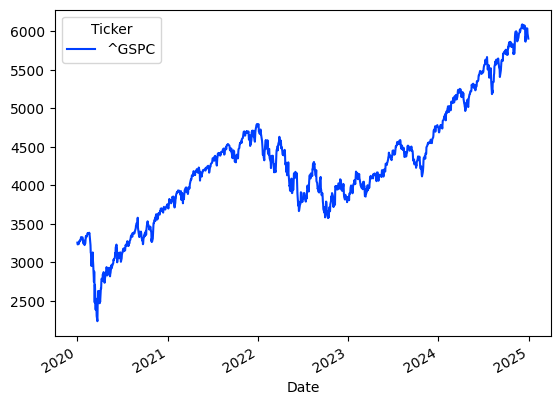

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print(plt.style.available)
plt.style.use('seaborn-v0_8-bright')
sp500.plot();

### Resampling i konwersja częstotliwości

Jedną z częstych potrzeb podczas pracy z danymi szeregów czasowych jest resampling na wyższą lub niższą częstotliwość.
Można to zrobić za pomocą metody `resample` lub znacznie prostszej metody `asfreq`.
Główna różnica między nimi polega na tym, że `resample` jest zasadniczo *agregacją danych*, podczas gdy `asfreq` jest zasadniczo *wyborem danych*.

Porównajmy, co obie metody zwracają, gdy dokonujemy downsamplingu danych o cenach zamknięcia S&P 500.
Tutaj przeprowadzimy resampling danych na koniec roku obrotowego; poniższy rysunek pokazuje wynik:

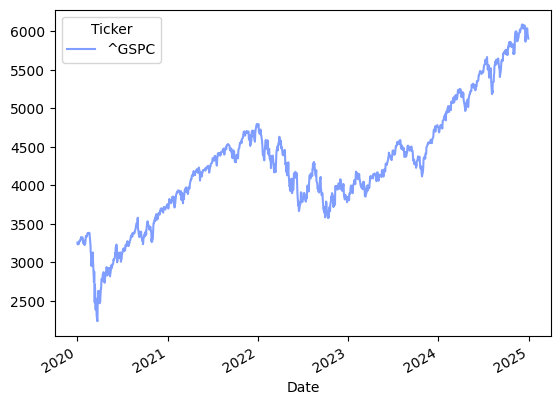

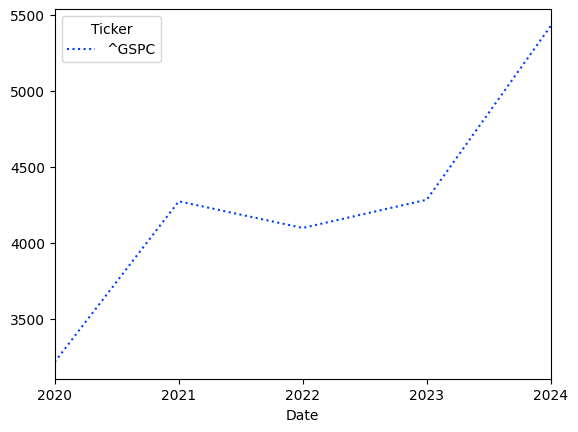

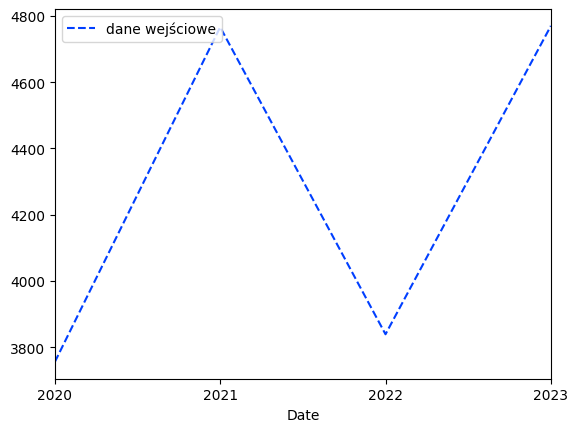

In [28]:
sp500.plot(alpha=0.5, style='-')
sp500.resample('BYE').mean().plot(style=':')
sp500.asfreq('BYE').plot(style='--');
plt.legend(['dane wejściowe', 'resample', 'asfreq'],
           loc='upper left');

Zwróć uwagę na różnicę: w każdym punkcie `resample` podaje *średnią z poprzedniego roku*, podczas gdy `asfreq` podaje *wartość na koniec roku*.

W przypadku upsamplingu `resample` i `asfreq` są w dużej mierze równoważne, chociaż `resample` ma znacznie więcej dostępnych opcji.
W tym przypadku domyślnie obie metody pozostawiają punkty po upsamplingu puste, czyli wypełnione wartościami NA.
Tutaj przeprowadzimy resampling danych z dni roboczych na częstotliwość dzienną (tj. włączając weekendy); poniższy rysunek pokazuje wynik:

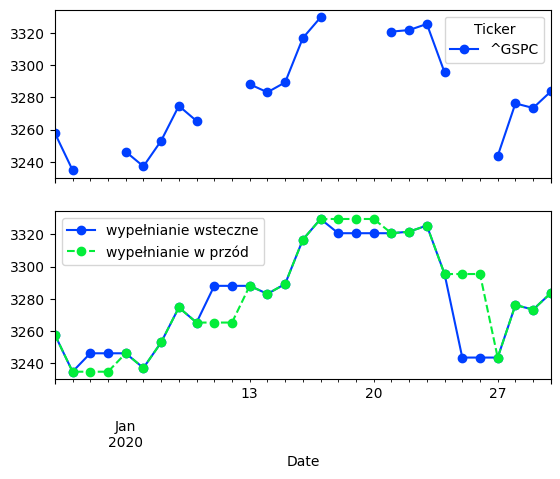

In [29]:
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["wypełnianie wsteczne", "wypełnianie w przód"]);

Ponieważ dane S&P 500 istnieją tylko dla dni roboczych, górny panel ma luki reprezentujące wartości NA.
Dolny panel pokazuje różnice między dwiema strategiami wypełniania luk: wypełnianiem w przód i wypełnianiem wstecznym.

### Przesunięcia czasowe

Inną powszechną operacją specyficzną dla szeregów czasowych jest przesuwanie danych w czasie.
W tym celu Pandas udostępnia metodę `shift`, której można użyć do przesuwania danych o zadaną liczbę wpisów.
W przypadku danych szeregów czasowych próbkowanych z regularną częstotliwością, może to dać nam sposób na badanie trendów w czasie.

Na przykład, tutaj przeprowadzamy resampling danych do wartości dziennych i przesuwamy o 364, aby obliczyć roczny zwrot z inwestycji dla S&P 500 w czasie (zobacz poniższy rysunek):

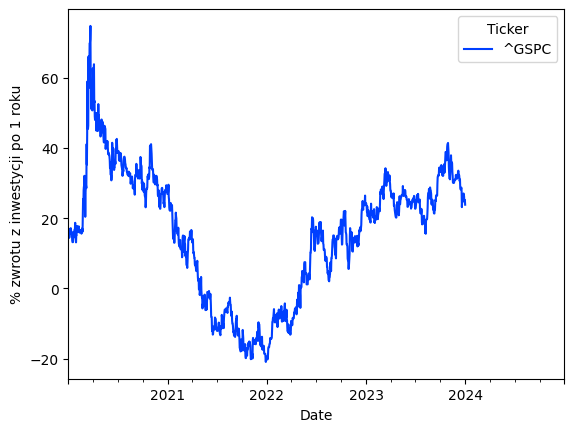

In [30]:
sp500 = sp500.asfreq('D', method='pad')

ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.plot()
plt.ylabel('% zwrotu z inwestycji po 1 roku');

Najgorszy roczny zwrot odnotowano około marca 2019 roku, z załamaniem rynku związanym z koronawirusem dokładnie rok później. Jak można się było spodziewać, najlepszy roczny zwrot można było uzyskać w marcu 2020 roku, dla tych, którzy mieli wystarczająco dużo przezorności lub szczęścia, aby kupić tanio.

### Okna kroczące

Obliczanie statystyk kroczących jest trzecim typem operacji specyficznej dla szeregów czasowych zaimplementowanej przez Pandas.
Można to osiągnąć za pomocą atrybutu `rolling` obiektów `Series` i `DataFrame`.
Ten widok kroczący udostępnia domyślnie wiele operacji agregacji.

Na przykład możemy przyjrzeć się rocznej wyśrodkowanej średniej kroczącej i odchyleniu standardowemu cen akcji (zobacz poniższy rysunek):

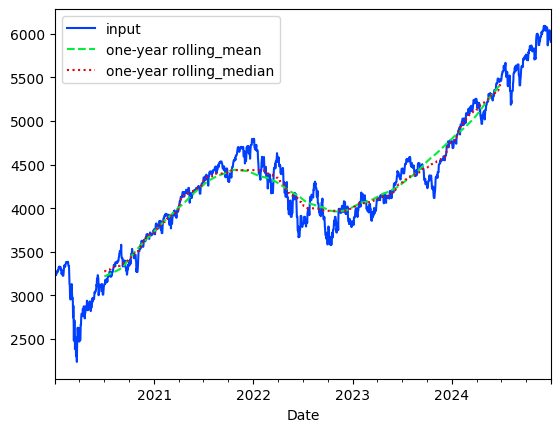

In [31]:
rolling = sp500['^GSPC'].rolling(365, center=True)

data = pd.DataFrame({'input': sp500['^GSPC'],
        'one-year rolling_mean': rolling.mean(),
        'one-year rolling_median': rolling.median()})
ax = data.plot(style=['-', '--', ':']),

Podobnie jak w przypadku operacji `groupby`, metody `aggregate` i `apply` mogą być używane do niestandardowych obliczeń kroczących.

## Przykład: Wizualizacja liczby rowerów w Seattle

Jako bardziej zaawansowany przykład pracy z danymi szeregów czasowych, przyjrzyjmy się liczbie rowerów na moście [Fremont Bridge w Seattle](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
Dane te pochodzą z automatycznego licznika rowerów zainstalowanego pod koniec 2012 roku, który ma czujniki indukcyjne na wschodnim i zachodnim chodniku mostu.
Godzinowe zliczenia rowerów można pobrać z [http://data.seattle.gov](http://data.seattle.gov); zbiór danych Fremont Bridge Bicycle Counter jest dostępny w kategorii Transport.

Plik CSV użyty w tej książce można pobrać w następujący sposób:

In [32]:
# przygotowanie katalogu roboczego do pracy :)
import requests

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

nazwyPlikow = ['Fremont_Bridge_Bicycle_Counter.csv']
for nazwa in nazwyPlikow:
  pobierzPlik("https://raw.githubusercontent.com/rroszczyk/Python/master/Pliki/"+nazwa, nazwa)

Po pobraniu tego zbioru danych możemy użyć Pandas do wczytania danych wyjściowych CSV do ramki danych (`DataFrame`).
Określimy, że chcemy, aby kolumna `Date` była indeksem, i chcemy, aby te daty były automatycznie parsowane:

In [33]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.tail()

/tmp/ipython-input-33-283628744.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2025-02-28 19:00:00,73.0,26.0,47.0
2025-02-28 20:00:00,60.0,24.0,36.0
2025-02-28 21:00:00,49.0,20.0,29.0
2025-02-28 22:00:00,26.0,10.0,16.0
2025-02-28 23:00:00,28.0,5.0,23.0


Dla wygody skrócimy nazwy kolumn:

In [34]:
data.columns = ['Total', 'East', 'West']

Teraz przyjrzyjmy się statystykom podsumowującym dla tych danych:

In [35]:
data.dropna().describe()

,Total,East,West
count,110203.000000,110203.000000,110203.000000
mean,105.671406,45.026605,60.644801
std,131.116919,58.749206,81.887885
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,145.000000,62.000000,80.000000
max,1097.000000,667.000000,850.000000


### Wizualizacja danych

Możemy uzyskać pewien wgląd w zbiór danych, wizualizując go.
Zacznijmy od wykreślenia surowych danych (zobacz poniższy rysunek):

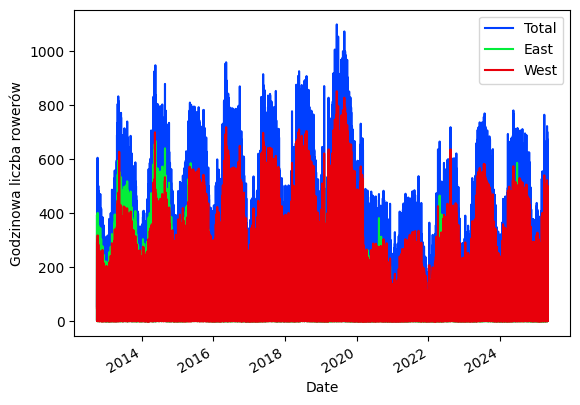

In [36]:
data.plot()
plt.ylabel('Godzinowa liczba rowerów');

Około 150 000 próbek godzinowych jest zbyt gęstych, abyśmy mogli z nich wiele wywnioskować.
Możemy uzyskać więcej informacji, dokonując resamplingu danych do rzadszej siatki.
Przeprowadźmy resampling według tygodni (zobacz poniższy rysunek):

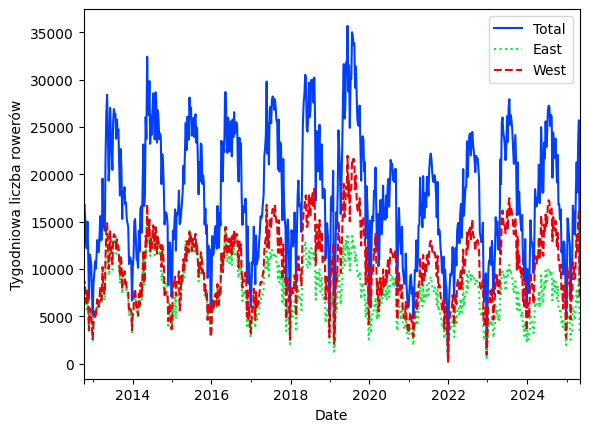

In [37]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Tygodniowa liczba rowerów');

To ujawnia pewne trendy: jak można się spodziewać, ludzie jeżdżą na rowerze więcej latem niż zimą, a nawet w obrębie danego sezonu użycie roweru zmienia się z tygodnia na tydzień. Ponadto, wpływ pandemii COVID-19 na wzorce dojazdów jest dość wyraźny, począwszy od początku 2020 roku.

Inną opcją, która przydaje się do agregacji danych, jest użycie średniej kroczącej, wykorzystując funkcję `pd.rolling_mean`.
Tutaj zbadamy 30-dniową średnią kroczącą naszych danych, upewniając się, że okno jest wyśrodkowane (zobacz poniższy rysunek):

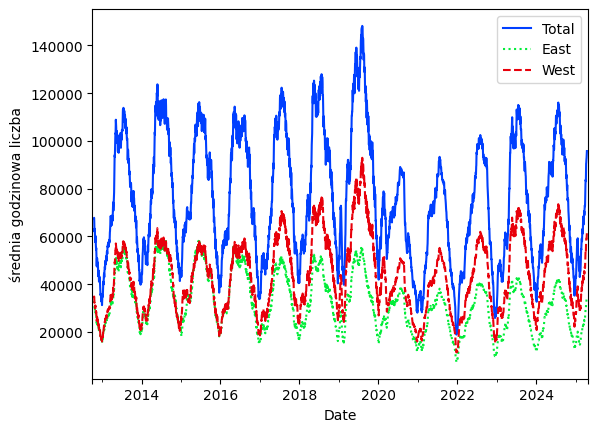

In [38]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('średnia godzinowa liczba');

Poszarpany charakter wyniku wynika z ostrego odcięcia okna.
Możemy uzyskać gładszą wersję średniej kroczącej, używając funkcji okna – na przykład okna Gaussa, jak pokazano na poniższym rysunku.
Poniższy kod określa zarówno szerokość okna (tutaj 50 dni), jak i szerokość okna Gaussa (tutaj 10 dni):

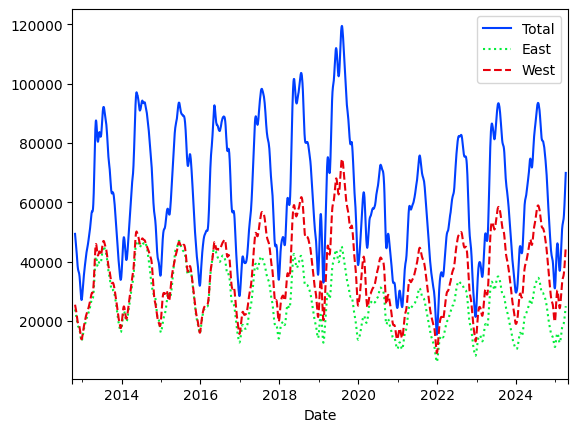

In [39]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', ':', '--']);

### Zagłębianie się w dane

Chociaż te wygładzone widoki danych są przydatne do uzyskania ogólnego pojęcia o trendzie w danych, ukrywają one wiele struktury.
Na przykład możemy chcieć przyjrzeć się średniemu natężeniu ruchu w zależności od pory dnia.


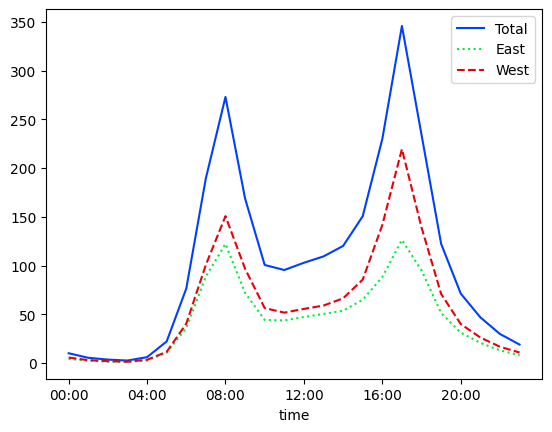

In [40]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--']);

Godzinowe natężenie ruchu to silnie bimodalna sekwencja, ze szczytami około 8:00 rano i 17:00 po południu.
Jest to prawdopodobnie dowód na silny komponent ruchu dojazdowego przez most.
Istnieje również komponent kierunkowy: według danych, wschodni chodnik jest używany częściej podczas porannego dojazdu, a zachodni chodnik jest używany częściej podczas popołudniowego dojazdu.

Możemy również być ciekawi, jak sytuacja zmienia się w zależności od dnia tygodnia. Ponownie, możemy to zrobić za pomocą prostego `groupby` (zobacz poniższy rysunek):

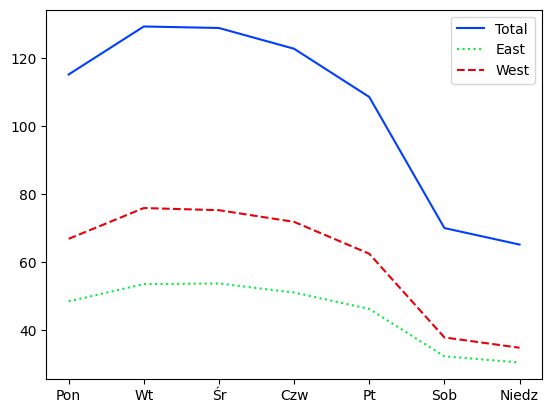

In [41]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Pon', 'Wt', 'Śr', 'Czw', 'Pt', 'Sob', 'Niedz']
by_weekday.plot(style=['-', ':', '--']);

To pokazuje silne rozróżnienie między sumami w dni robocze i weekendy, z około dwukrotnie większą średnią liczbą rowerzystów przejeżdżających przez most od poniedziałku do piątku niż w sobotę i niedzielę.

Mając to na uwadze, wykonajmy złożone `groupby` i przyjrzyjmy się trendom godzinowym w dni robocze w porównaniu z weekendami.
Zaczniemy od grupowania według flag oznaczających weekend i pory dnia:

In [42]:
weekend = np.where(data.index.weekday < 5, 'Dzień roboczy', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Teraz użyjemy Matplotlib, aby wykreślić dwa panele obok siebie, jak pokazano na poniższym rysunku:

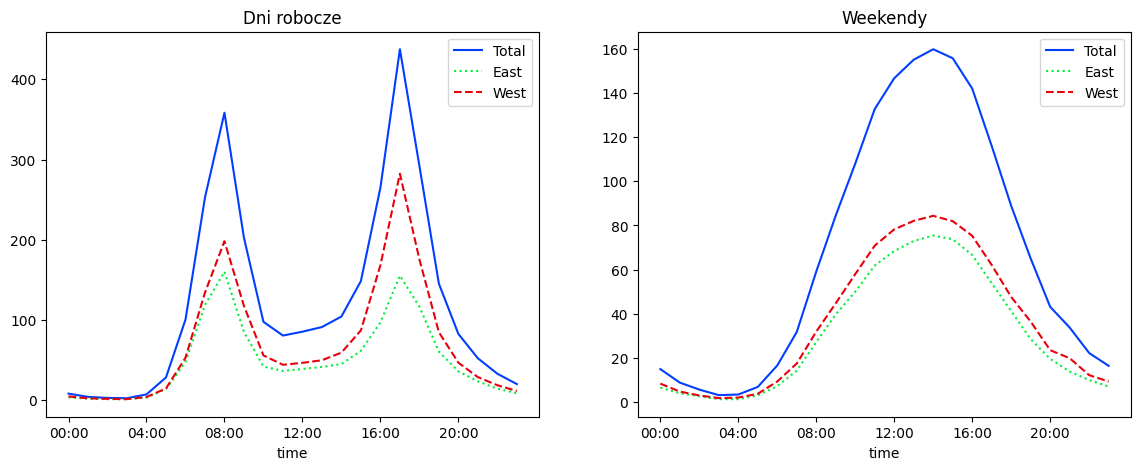

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Dzień roboczy'].plot(ax=ax[0], title='Dni robocze',
                            xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekendy',
                            xticks=hourly_ticks, style=['-', ':', '--']);